In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display
from sklearn import metrics

In [2]:
data = pd.read_excel (r'D:\Downloads\rk_month.xlsx')
data['From Date']=pd.to_datetime(data['From Date'])
data['year'] = data['From Date'].dt.year
data['month'] = data['From Date'].dt.month
data['day'] = data['From Date'].dt.day

In [3]:
import datetime as dt

In [4]:
data['From Date']= data['From Date'].map(dt.datetime.toordinal)

In [5]:
df=data.loc['0':'365']

In [6]:
X1 = df[['From Date','year', 'month', 'day']]
Y1 = df['PM2.5']

In [7]:
xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1,test_size=.2,random_state=3)

In [8]:
forest = RandomForestRegressor(n_estimators=1200,
                              max_depth=8,
                              max_features='auto',
                              min_samples_split=7,
                              min_samples_leaf=3,random_state=10)

forest.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=8, min_samples_leaf=3, min_samples_split=7,
                      n_estimators=1200, random_state=10)

In [9]:
# we now score the model
print('Score on train data: {}\n'.format(forest.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(forest.score(xtest,ytest)))

forest_pred = forest.predict(xtest)
forest_mse = mean_squared_error(ytest,forest_pred)
forest_accuracy = r2_score(ytest,forest_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(forest_mse)))
print('Overall model accuracy: {}'.format(forest_accuracy))

Score on train data: 0.879830963116118

Score on test data: 0.8173336728572272

Root Mean Squared Error: 31.771830854326954

Overall model accuracy: 0.8173336728572272


In [10]:
test=data.loc['366':'418']
X=test[['From Date','year', 'month', 'day']]
X

,From Date,year,month,day
366,737436,2020,1,12
367,737443,2020,1,19
368,737450,2020,1,26
369,737457,2020,2,2
370,737464,2020,2,9
371,737471,2020,2,16
372,737478,2020,2,23
373,737485,2020,3,1
374,737492,2020,3,8
375,737499,2020,3,15


In [11]:
predict=forest.predict(X)

In [12]:
predict

array([208.23020437, 190.6003825 , 172.48928467, 179.31733915,
       152.19059339, 150.53515152, 105.11348429,  90.03685048,
        76.15204673,  75.16464728,  75.48723857,  76.64904476,
        76.39097224,  75.82140125,  74.80691414,  77.30920458,
        92.25764156,  83.45163478,  78.04247547,  78.46489387,
        79.69639058,  75.99873798,  72.96723397,  71.84373277,
        62.33439421,  41.45933997,  40.46402396,  38.35901527,
        36.82813725,  39.39671649,  41.82552055,  39.20785325,
        37.57628406,  36.74054854,  42.67315849,  41.86476596,
        40.85598906,  39.77907884,  74.23818665,  86.44428934,
       110.19020881, 121.55588853, 163.28112716, 176.40906793,
       170.75237228, 159.32409175, 162.33301897, 164.42703716,
       166.64213998, 157.31525982, 159.46335766, 234.22755333])

In [13]:
X['From Date']= X['From Date'].map(dt.datetime.fromordinal)

In [14]:
test['From Date']= test['From Date'].map(dt.datetime.fromordinal)

In [15]:
test = test.set_index(['From Date'])
X = X.set_index(['From Date'])


In [16]:
X['pred']=predict

In [45]:
from matplotlib import style
style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

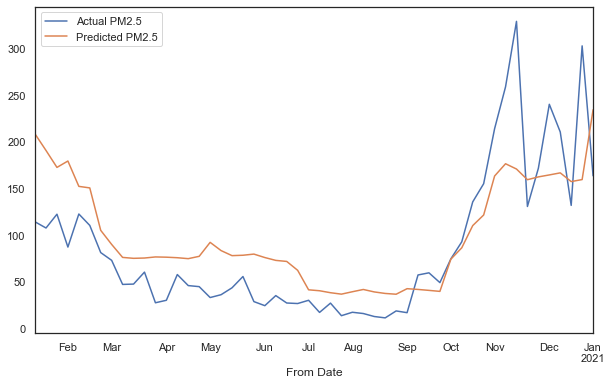

In [46]:
test['PM2.5'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
X['pred'].plot(legend=True, label='Predicted PM2.5')
plt.style.use('seaborn-white')

In [18]:
np.sqrt(mean_squared_error(test['PM2.5'],X['pred']))

50.43204200954212

In [19]:
mae = metrics.mean_absolute_error(ytest, forest_pred)
mse = metrics.mean_squared_error(ytest, forest_pred)
rmsetest = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,forest_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmsetest)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 22.271657177249757
MSE: 1009.4492358359621
RMSE: 31.771830854326954
R-Squared: 0.8173336728572272


In [20]:
mae = metrics.mean_absolute_error(test['PM2.5'],X['pred'])
mse = metrics.mean_squared_error(test['PM2.5'],X['pred'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test['PM2.5'],X['pred'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 39.78089309464507
MSE: 2543.3908612522214
RMSE: 50.43204200954212
R-Squared: 0.5716248623002813


In [21]:
import pickle
filename = 'PM2.5_model.sav'
pickle.dump(forest, open(filename, 'wb'))

In [22]:
#load model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

0.8173336728572272


In [23]:
pred1=X.loc["2020-03-25":"2020-04-14",'pred']

In [24]:
pred1.median()

76.3909722400174

In [25]:
ytest.std()

74.84579803077571

In [26]:
pred1=X.loc["2020-03-25":"2020-04-14",'pred']
pred2=X.loc["2020-08-01":"2020-11-30",'pred']
pred3=X.loc["2020-04-15":"2020-05-17",'pred']
pred2.median()

58.45567257433515

In [27]:
X

,year,month,day,pred
From Date,,,,
2020-01-12,2020,1,12,208.230204
2020-01-19,2020,1,19,190.600383
2020-01-26,2020,1,26,172.489285
2020-02-02,2020,2,2,179.317339
2020-02-09,2020,2,9,152.190593
2020-02-16,2020,2,16,150.535152
2020-02-23,2020,2,23,105.113484
2020-03-01,2020,3,1,90.036850
2020-03-08,2020,3,8,76.152047


In [28]:
pred3=X.loc["2020-01-30":"2020-03-22",'pred']
pred3.median()

97.5751673860869

# 3rd plot

In [29]:
testcase = pd.DataFrame()

In [30]:
testcase['test']=ytest
testcase['pred']=forest_pred

In [31]:
testcase["Corrected"] = np.where(testcase["pred"]<testcase["test"],testcase["pred"]+rmsetest ,
                   np.where(testcase["pred"]>testcase["test"], testcase["pred"]-rmsetest,
                            testcase["pred"]))

In [32]:
testcase

,test,pred,Corrected
102,205.101429,225.157973,193.386143
330,71.528571,82.094990,50.323159
240,42.341429,48.287973,16.516142
24,97.628571,80.880969,112.652800
134,30.080000,61.391033,29.619202
...,...,...,...
123,105.201429,108.381582,76.609751
214,97.521429,148.705828,116.933997
23,89.071429,91.617761,59.845930
209,95.229429,209.825237,178.053406


In [33]:
'''testcase['test'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
testcase['pred'].plot(legend=True, label='Predicted PM2.5')
testcase["Corrected"].plot(legend=True, label='Corrected PM2.5')'''

'testcase[\'test\'].plot(legend=True, label=\'Actual PM2.5\', figsize=(10,6))\ntestcase[\'pred\'].plot(legend=True, label=\'Predicted PM2.5\')\ntestcase["Corrected"].plot(legend=True, label=\'Corrected PM2.5\')'

In [34]:
r2 = metrics.r2_score(testcase["Corrected"],testcase['test'])
r2

0.8887581003972216

In [35]:
test2020=pd.DataFrame()

In [36]:
test2020['test']=test['PM2.5']
test2020['pred']=X['pred']

In [37]:
test2020.index=test.index

In [38]:
test2020["Corrected"] = np.where(test2020["pred"]<test2020["test"],test2020["pred"]+rmsetest ,
                   np.where(test2020["pred"]>test2020["test"], test2020["pred"]-rmsetest,
                            test2020["pred"]))

<AxesSubplot:xlabel='From Date'>

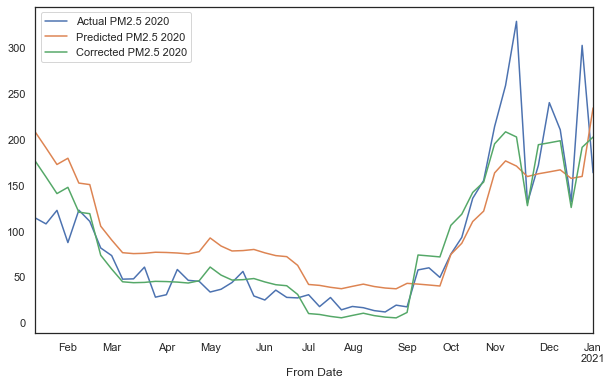

In [39]:
test2020['test'].plot(legend=True, label='Actual PM2.5 2020', figsize=(10,6))
test2020['pred'].plot(legend=True, label='Predicted PM2.5 2020')
test2020["Corrected"].plot(legend=True, label='Corrected PM2.5 2020')

In [40]:
r2020 = metrics.r2_score(test2020["Corrected"],test2020['test'])
r2020

0.7667579928979564